<a href="https://colab.research.google.com/github/soyoonjeong/deeplearning_from_scratch/blob/main/ch6_%ED%95%99%EC%8A%B5_%EA%B4%80%EB%A0%A8_%EA%B8%B0%EC%88%A0%EB%93%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 매개변수 갱신 방법에는 SGD 외에도 Momentum, AdaGrad, Adam 등이 있음
- 가중치 초깃값을 정하는 방법은 올바른 학습을 하는 데 매우 중요함
- 가중치의 초깃값으로는 'Xavier 초깃값'과 'He 초깃값'이 효과적
- 배치 정규화를 이용하면 학습을 빠르게 진행할 수 있으며 초깃값에 영향을 덜 받게 됨
- 오버피팅을 억제하는 정규화 기술로는 가중치 감소와 드롭아웃이 있음
- 하이퍼파라미터 값 탐색은 최적 값이 존재할 법한 범위를 점차 좁히면서 하는 것이 효과적적

In [ ]:
import numpy as np

# 매개변수 갱신 (최적화)

**최적화** : 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것

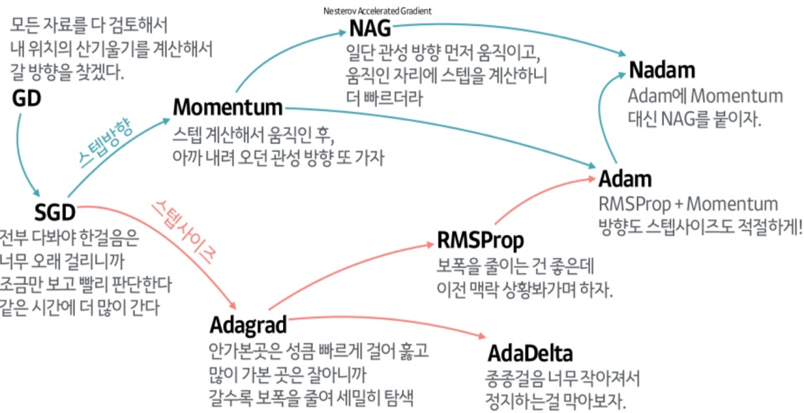

## 확률적 경사 하강법(SGD)

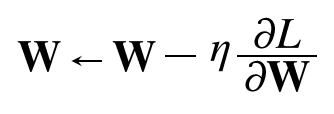

**매개변수의 기울기**를 구해 기울어진 방향으로 매개변수 값을 갱신하는 일을 반복하여 점점 최적의 값에 다가감

In [ ]:
class SGD: # 최적화를 담당하는 클래스를 분리해 구현하면 기능을 모듈화하기 좋다!
  def __init__(self, lr = 0.01):
    self.lr = lr

  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]

- 장점 : 단순하고 구현이 쉬움
- 단점 : 비등방성 함수(방향에 따라 기울기가 달라지는 함수)에서는 탐색 경로가 비효율적 => 최솟값에 다다를 때까지 위아래로 요동치며 움직임임

## 모멘텀 (Momentum)

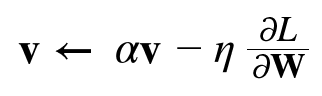<Br>
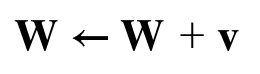

⭐ **과거의 진행방향을 참고하는 관성을 사용** <br>
**v**는 '속도'에 해당하여 기울기 방향으로 힘을 받아 물체가 가속된다는 물리 법칙을 나타냄 <br>
=> 공이 그릇의 바닥을 구르는 듯한 움직임을 보여줌<br>
**av**는 물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할을 함 (지면마찰이나 공기저항)

In [ ]:
class Momentum:
  def __init__(self, lr = 0.01, momentum = 0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None

  def update(self, params, grads):
    if self.v is None:
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)
    for key in params.keys():
      self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
      self.params[key] += self.v[key]

## AdaGrad

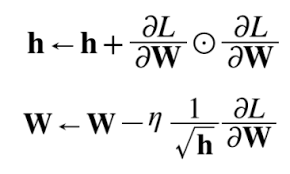

⭐ **이제까지 계산된 gradient에 따라 다른 학습률을 가지도록 함** <br>
학습을 진행하면서 각각의 매개변수에 맞게 **학습률을 점차 줄여감** <br>
**h**는 기존 기울기의 값을 제곱하여 계속 더해감 => 매개변수의 원소 중에서 많이 움직인 원소는 학습률이 낮아짐 

🥑 AdaGrad : 과거의 기울기를 제곱하여 계속 더해가기에 학습을 진행할수록 갱신 강도가 약해짐 => 갱신량이 0이 될 수도 있음 <br>
🥑 RMSProp :  먼 과거의 기울기는 서서히 잊고 새로운 기울기 정보를 크게 반영 

In [ ]:
class AdaGrad:
  def __init__(self, lr = 0.01):
    self.lr = lr
    self.h = None

  def update(self, params, grads):
    if self.h is None:
      self.h = {}
      for key, val in params.items():
        self.h[key] = np.zeros_like(val)
      
    for key in params.keys():
      self.h[key] += grads[key] * grads[key]
      params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

## Adam

**Momentum + AdaGrad** <br>
관성과 스텝사이즈 변화 다 고려

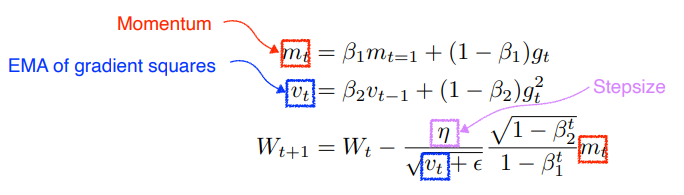

In [ ]:
class Adam:
  def __init__(self, lr = 0.001, beta1 = 0.9, beta2 = 0.999):
    self.lr = lr
    self.beta1 = beta1
    self.beta2 = beta2
    self.iter = 0
    self.m = None
    self.v = None

  def update(self, params, grads):
    if self.m is None:
      self.m, self.v = {}, {}
      for key, val in params.items():
        self.m[key] = np.zeros_like(val)
        self.v[key] = np.zeros_like(val)

    self.iter += 1
    lr_t = self.lr * np.sqrt(1.0 - self.beta2 ** self.iter) / (1.0 - self.beta1**self.iter)

    for key in params.keys():
      self.m[key] += (1- self.beta1) * (grads[key] - self.m[key])
      self.v[key] += (1- self.beta2) * (grads[key]**2 - self.v[key])
      params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)


## 갱신 방법 비교 

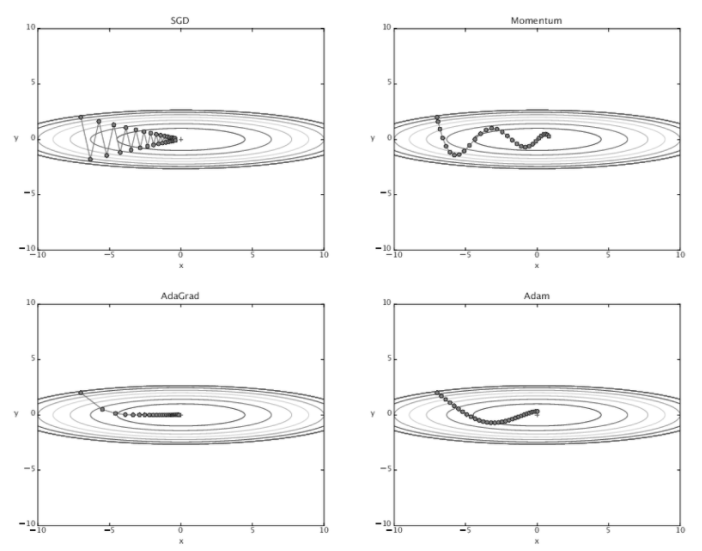

하이퍼파리미터인 학습률과 신경망의 구조에 따라 결과가 달라짐 <br>
일반적으로 SGD보다 다른 세 기법(Momentum, AdaGrad, Adam)이 빠르게 학습하고 최종 정확도도 높게 나타남 

# 가중치의 초깃값

## 초깃값을 0으로 하면?
**가중치를 균일한 값으로 설정하면 안된다!** <br>
같은 초깃값에서 시작하면 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문 <br>
초깃값을 무작위로 설정해야 함 

## 은닉층의 활성화값 분포 

### 초깃값 : 표준편차 1인 정규분포 

In [ ]:
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1+np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
  if i!= 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) * 1 # 표준편차가 1인 정규분포 
  a = np.dot(x, w)
  z = sigmoid(a)
  activations[i] = z

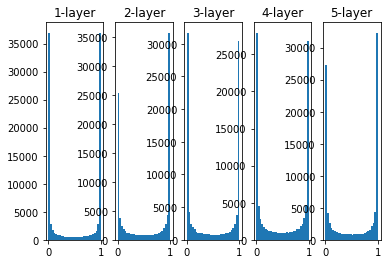

In [ ]:
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range = (0, 1))
plt.show()

각 층의 활성화값이 0과 1로 치우쳐 있음 <br>
=> 역전파의 기울기 값이 점점 작아지다 사라짐 (기울기 소실)

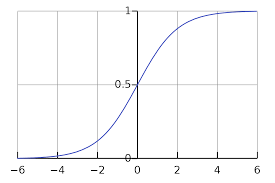

### 초깃값 : 표준편차 0.01인 정규분포 

In [ ]:
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1+np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
  if i!= 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) * 0.01 # 표준편차가 0.01인 정규분포 
  a = np.dot(x, w)
  z = sigmoid(a)
  activations[i] = z

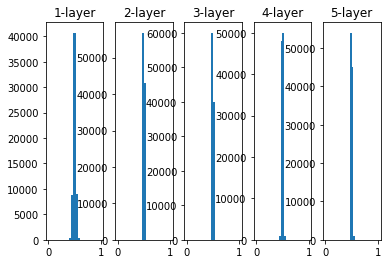

In [ ]:
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range = (0, 1))
plt.show()

각 층의 활성화값이 0.5 부근에 집중됨 <br>
=> 다수의 뉴런이 거의 같은 값을 출력하고 있으니 표현력이 제한됨 (뉴런 1개와 다를 바 없음)

### Xavier 초깃값
앞 계층의 노드가 n개라면 표준편차가 1/np.sqrt(n)인 분포를 사용 <br>
앞 층에 노드가 많을수록 대상 노드의 초깃값을 설정하는 가중치가 좁게 퍼짐 <br>
활성화 함수가 선형인 것에 특화 (sigmoid, tanh)

In [ ]:
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1+np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
  if i!= 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
  a = np.dot(x, w)
  z = sigmoid(a)
  activations[i] = z

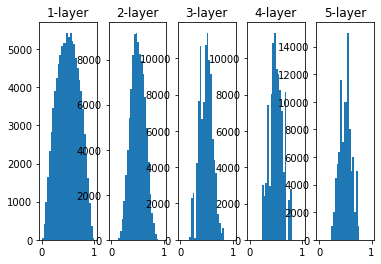

In [ ]:
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range = (0, 1))
plt.show()

## ReLU를 사용할 때의 가중치 초깃값 : He 초깃값

앞 계층의 노드가 n개일 때 표준편차가 np.sqrt(2/n)인 정규분포 사용 <br>
ReLu는 음의 영역이 0이라서 더 넓게 분포시키기 위해 2배의 계수가 필요

In [ ]:
import matplotlib.pyplot as plt

def relu(x):
  return np.maximum(x, 0)

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
  if i!= 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) * np.sqrt(2/node_num)
  a = np.dot(x, w)
  z = relu(a)
  activations[i] = z

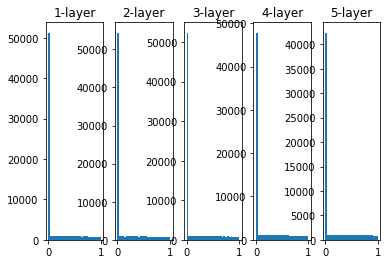

In [ ]:
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range = (0, 1))
plt.show()

모든 층에서 균일하게 분포됨 

- 활성화 함수로 ReLU를 사용할 때 : He 초깃값
- 활성화 함수로 sigmoid, tanh 등의 s자 모양 곡선을 사용할 때 : Xavier 초깃값

# 배치 정규화

PROBLEM : Internal Covariate Shift (모델 학습 과정에서 layer를 통과할 때마다 층의 구조나 활성화 함수에 따라 출력값의 데이터 분포가 layer마다 다르게 나타남) <br>
**SOLUTION : 배치 정규화 (각 층에서의 활성화 값이 적당히 분포되도록 조정)**
- 학습을 빠르게 진행할 수 있음
- 초깃값에 크게 의존하지 않음
- 오버피팅 억제 

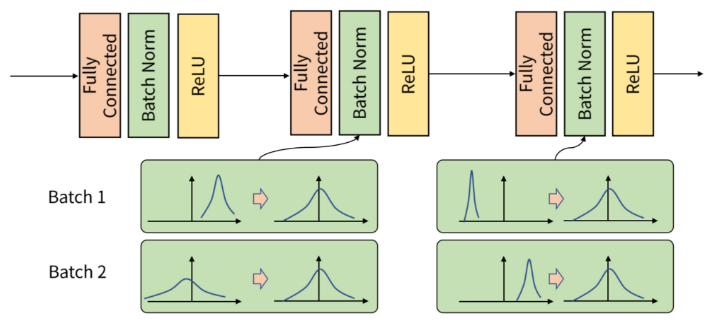

- 미니 배치의 평균과 분산을 구함 
- 입력 데이터를 평균이 0, 분산이 1이 되게 정규화함 
- 확대와 이동 변환 수행 

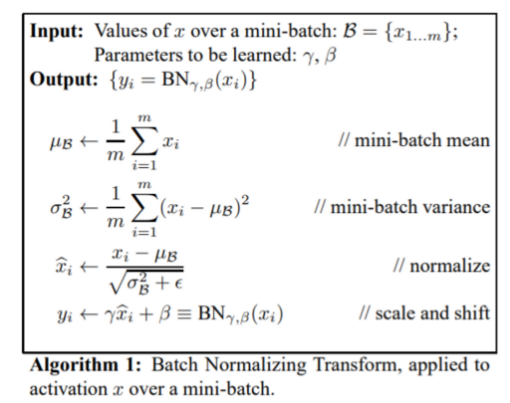

# 오버피팅 억제 (정규화)

## 오버피팅

: 신경망이 훈련 데이터에만 지나치게 적응되어 그 외의 데이터에는 제대로 대응하지 못하는 상태 
- 매개변수가 많고 표현력이 높은 모델
- 훈련 데이터가 적음 

In [ ]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
ls

 chromedriver.exe
'Colab Notebooks'/
 common/
 dataset/
 goodde.drawio
'goodde의 복사본.drawio'
'goodde의 복사본의 복사본.drawio'
 GoodNotes/
 han.jpg
 image@
 image2.png
 pythonworkspace/
 repos/
 방콕✈️.gmap
 부산🌊.gmap
 세계사_인간과문명_펠로폰네소스전쟁사_수업자료.pdf
'코린토스 대 아테네 (1).gslides'
'코린토스 대 아테네.gslides'


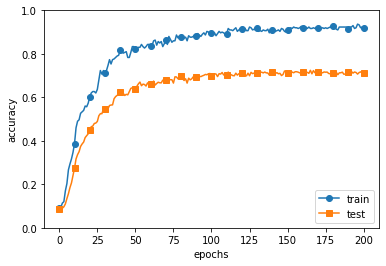

In [ ]:
# coding: utf-8
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        #print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

훈련 데이터에만 적응을 하여 훈련 데이터의 정확도가 현저히 높음음

## 가중치 감소 

**가중치의 제곱 노름(L2 노름)을 손실 함수에 더해 가중치가 커지는 것을 억제**<br>
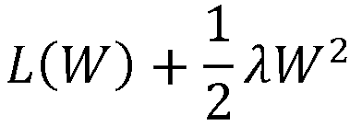

- 람다를 크게 설정할 수록 큰 가중치에 대한 페널티가 커짐 
- 1/2는 미분을 위한 것
- 가중치의 기울기를 구하는 계산에서는 오차역전파법에 따른 결과에 정규화 항을 미분한 람다 * W를 더함함

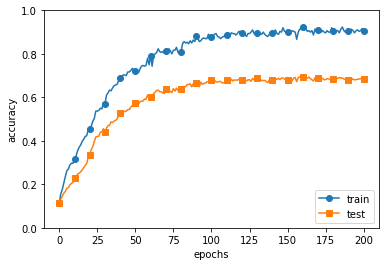

In [ ]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        #print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 드롭아웃

**뉴런을 임의로 삭제하면서 학습하는 방법**
- 훈련 때는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택
- 시험 때는 모든 뉴런에 신호를 전달 (각 뉴런의 출력에 훈련 때 삭제 안 한 비율을 곱하여 출력)

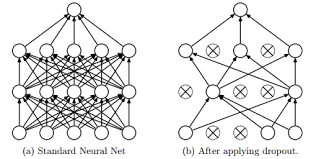

In [ ]:
class Dropout:
  def __init__(self, dropout_ratio = 0.5):
    self.dropout_ratio = dropout_ratio
    self.mask = None

  def forward(self, x, train_flg = True):
    if train_flg:
      self.mask = np.random.rand(*x.shape) > self.dropout_ratio # x와 형상이 같은 배열을 무작위로 생성하고 그 값이 dropout_ratio보다 큰 원소만 True로 설정
      return x * self.mask
    else:
      return x * (1.0 - self.dropout_ratio)
    
  def backward(self, dout):
    return dout * self.mask # 순전파 때 신호를 통과시키는 뉴런은 역전파 때도 신호를 그대로 통과, 순전파 때 통과시키지 않은 뉴런은 역전파 때도 차단

train loss:2.3334784492469005
=== epoch:1, train acc:0.07, test acc:0.0967 ===
train loss:2.342689099057289
train loss:2.3299091435287997
train loss:2.3096518090834954
=== epoch:2, train acc:0.07, test acc:0.0964 ===
train loss:2.324569539238691
train loss:2.3263296781940963
train loss:2.3136698769382895
=== epoch:3, train acc:0.07333333333333333, test acc:0.0956 ===
train loss:2.33394751987542
train loss:2.3083761546945722
train loss:2.3200447054458926
=== epoch:4, train acc:0.07666666666666666, test acc:0.0985 ===
train loss:2.3312197541844824
train loss:2.3206561342654295
train loss:2.320282446037073
=== epoch:5, train acc:0.07666666666666666, test acc:0.1005 ===
train loss:2.309892689417745
train loss:2.3103953148651435
train loss:2.3275995405298504
=== epoch:6, train acc:0.07666666666666666, test acc:0.1025 ===
train loss:2.317618183820409
train loss:2.31402909732744
train loss:2.2927056589106027
=== epoch:7, train acc:0.07333333333333333, test acc:0.1017 ===
train loss:2.28429427

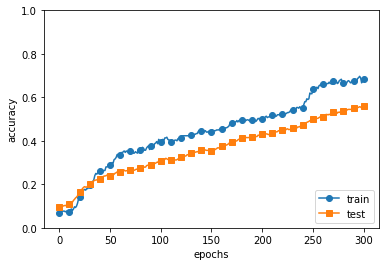

In [ ]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

🥑 드롭아웃과 앙상블은 밀접하다! <br>
학습 때 뉴런을 무작위로 삭제하는 행위를 매번 다른 모델을 학습시키는 것으로 해석할 수 있기 때문 <br>
=> 드롭아웃은 앙상블 학습과 같은 효과를 하나의 네트워크로 구현했다고 생각각

# 적절한 하이퍼파라미터 값 찾기

## 검증 데이터

: 하이퍼파라미터 값이 시험 데이터에 오버피팅되는 것을 막기 위한 하이퍼파라미터 조정용 데이터 
- 훈련 데이터 : 매개변수 학습
- 검증 데이터 : 하이퍼파라미터 성능 평가
- 시험 데이터 : 신경망의 범용 성능 평가


In [1]:
%cd /content/drive/My Drive/
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


/content/drive/My Drive


## 하이퍼파라미터 최적화

0. 하이퍼파라미터 값의 범위 설정 (10의 거듭제곱 단위로)
1. 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출
2. 1단계에서 샘플링한 하이퍼파라미터 의 값을 사용해 학습하고 검증 데이터로 정확도를 평가 (에폭 작게)
3. 1,2 단계 반복하며 하이퍼파라미터의 범위 좁힘힘